This notebook is to support .py modules written later.

In [17]:
#Plotting tools
import matplotlib.pyplot as plt

In [18]:
#Numerical tools
import numpy as np

In [19]:
from read_raster import *
from misc import *

**Prepare files**

In [20]:
main_path = "fire_C11659/"

In [21]:
pre_path   = "S2A_MSIL2A_20250509T192831_N0511_R099_T09UYU_20250509T234714_cloudfree.bin_MRAP_C11659.bin"
post_path  = "S2A_MSIL2A_20251009T193831_N0511_R142_T09UYU_20251009T234613_cloudfree.bin_MRAP_C11659.bin"

In [22]:
pre_date  = pre_path[11:19]
post_date = post_path[11:19]

**Raster instances**

In [23]:
raster_1_raw = Raster(main_path + pre_path)
raster_2_raw = Raster(main_path + post_path)

**Read raster and crop**

In [24]:
raster_1 = raster_1_raw.read_trim()
raster_2 = raster_2_raw.read_trim()

**Plot Rasters**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07860111..4.2914944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19812171..8.589286].


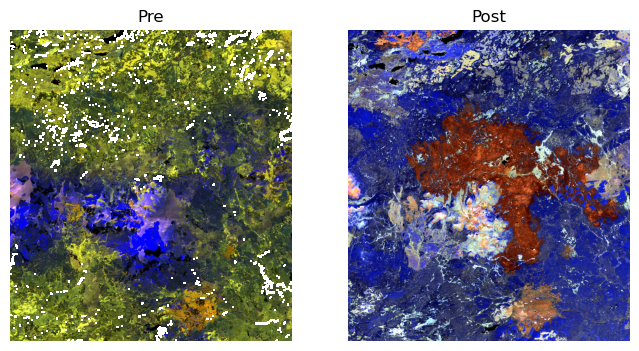

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (8, 20))

axes[0].imshow(raster_1)
axes[0].axis("off")
axes[0].set_title("Pre")

axes[1].imshow(raster_2)
axes[1].axis("off")
axes[1].set_title("Post")

plt.show()

**Who is larger Thresholding -> File: image_threshold.py**

This module receives **1 image**, with a chosen channel for thresholding.

The channel will be compared against the other channels, it returns 1 if larger, 0 if smaller or equal.

The resulting image is a Black and White img, basically boolean.

In [26]:
from dominant_band import *

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07860111..4.2914944].


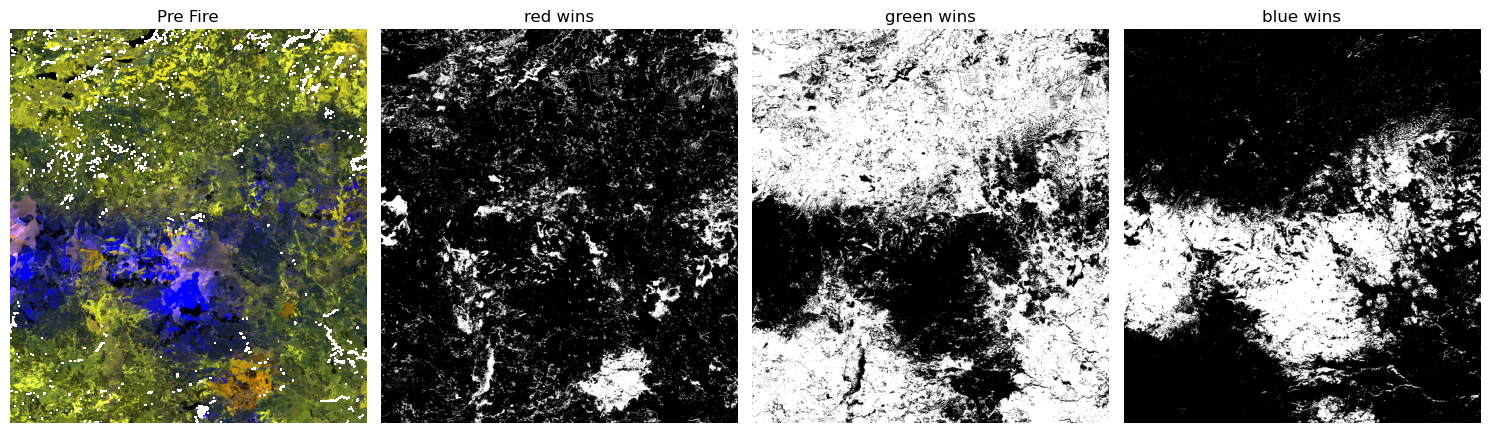

In [27]:
plot(raster_1, title='Pre Fire')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19812171..8.589286].


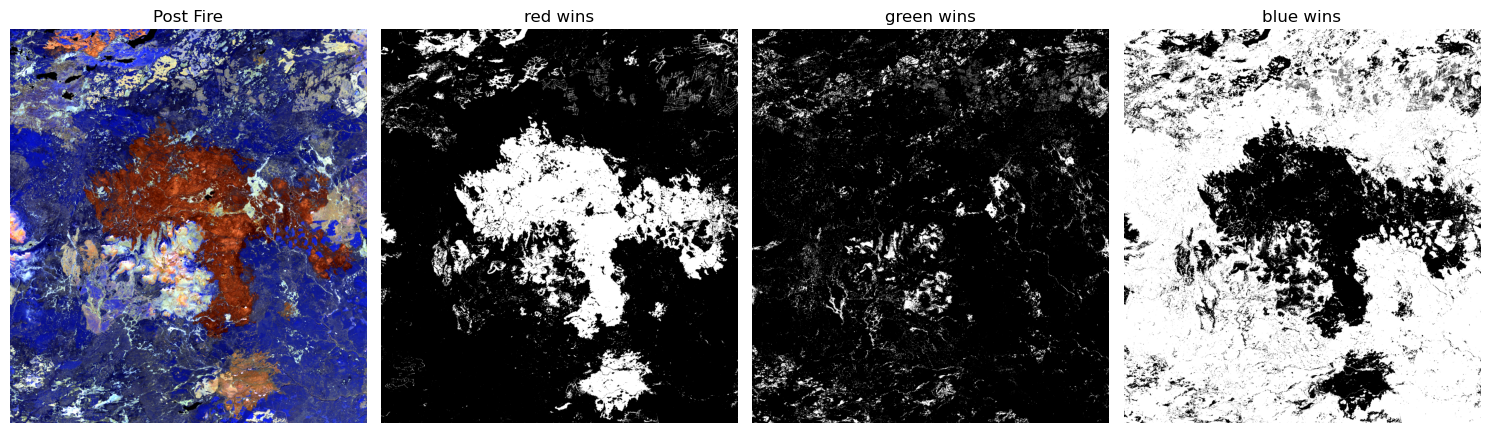

In [28]:
plot(raster_2, title='Post Fire')

**Change detection**

After the fire, how does each channel change?

In [29]:
def change_detection(
    pre_pixels, 
    post_pixels
):
    
    '''
    Compare pixel value between post and pre fire, then normalize it so that it stays between -1 and 1

    Result: 
        If the intensity increases in terms of band values (closer to 255), it will be brighter. Otherwise, it will be dark.
        If the intensity decreases, it will be dark (darker than no changes)
        If the intensity stays the same, it will be approx. 0

    Remember, order of images matters.
    '''

    #Returns error if sizes mismatch

    im1 = pre_pixels[:,:,:3].astype(np.float32)
    im2 = post_pixels[:,:,:3].astype(np.float32)

    d = im2 - im1
    n = im2 + im1

    norm_diff = d / (n + 1e-3)

    return norm_diff

In [30]:
diff = change_detection(
    raster_1,
    raster_2
)

In [31]:
htrim_diff = htrim_rgb(diff, p = 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07860111..4.2914944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19812171..8.589286].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-121254.3..10542.077].


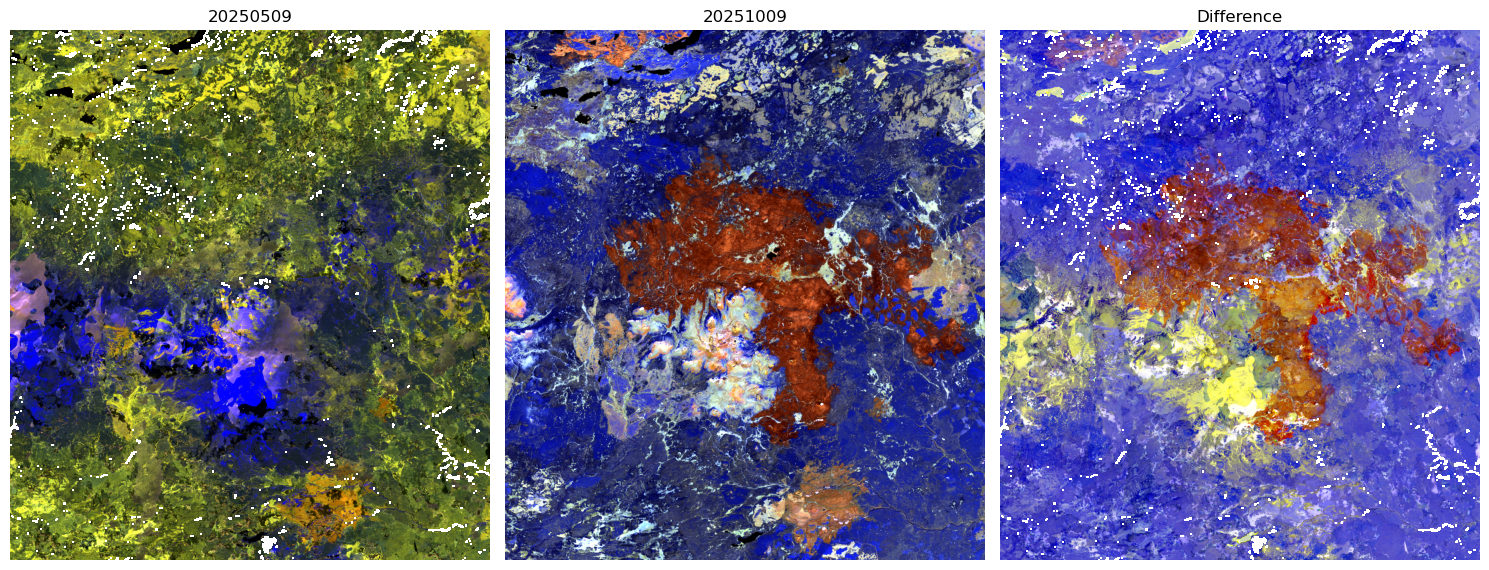

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (15, 10))

axes[0].imshow(raster_1)
axes[0].axis("off")
axes[0].set_title(pre_date)

axes[1].imshow(raster_2)
axes[1].axis("off")
axes[1].set_title(post_date)

axes[2].imshow(htrim_diff)
axes[2].axis("off")
axes[2].set_title("Difference")

plt.tight_layout()
plt.show()